# Questions 21 - 30

## Import all Libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import datetime
from datetime import datetime
import re
import matplotlib
import matplotlib.pyplot as plt

### 21. Function to find the center element in the list. (1 element in odd length list, 2 elements in even length list)

In [3]:
#read excle into dataframe
df1 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Patients')

In [46]:
gvn_list = ['a', 'b', 'c', 'd', 'f','h']
# Calculate the length of the list using the len() function and store it in a variable.
lst_leng = len(gvn_list)
# Find the middle element of the given List by using (total length of list-1)
# divided by 2( zero indexing)and store it in a variable.
mid_vlu_odd = (lst_leng-1)//2
# Check if the given list is even or odd using the If conditional statement.
if(lst_leng % 2 == 0):
    # If the length of given list is even , get middle two elements.
    even_mid_v1 = (lst_leng-1)//2
    print(even_mid_v1)
    even_mid_v2 = (lst_leng+1)//2
    print(even_mid_v2)
    eve_res_vlu1 = gvn_list[even_mid_v1]
    eve_res_vlu2 = gvn_list[even_mid_v2]
    print('The Median of the even List of Elements =', eve_res_vlu1,eve_res_vlu2)
    
else:
    # If the length of given list is odd , Median  is the middle element.
    odd_res_vlu = gvn_list[mid_vlu_odd]
    print('The Median of the odd List of Elements =', odd_res_vlu)

2
3
The Median of the even List of Elements = c d


### 22. Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions

In [49]:
#read excle into dataframe
df2 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='EDVisits')
df2

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted
...,...,...,...,...,...,...,...
1194,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,Discharged
1195,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,Discharged
1196,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,Discharged
1197,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,Discharged


In [56]:
g = df2.groupby(df2.EDDisposition.str[0])['EDDisposition']

In [65]:
print(g)

In [63]:
s = df2.groupby([df2.ReasonForVisit, g.transform('last')]).size().unstack()

In [64]:
print(s)

EDDisposition        Admitted  Discharged
ReasonForVisit                           
Accident                 39.0         NaN
Bleeding                 16.0        15.0
Car Accident             17.0         NaN
Chest Pain               94.0        15.0
Cough                     NaN         1.0
Fever                    46.0       188.0
Gun Shot                 16.0         NaN
Intoxication              NaN        30.0
Laceration                NaN        30.0
Migraine                 47.0       109.0
Pneumonia               136.0        65.0
Shortness of Breath      72.0        77.0
Stomach Ache             32.0       154.0


### 23 Plot a graph by counting the no. of patients in each department

In [66]:
#read excle into dataframe
df3 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='AmbulatoryVisits')

Text(0, 0.5, 'Frequency')

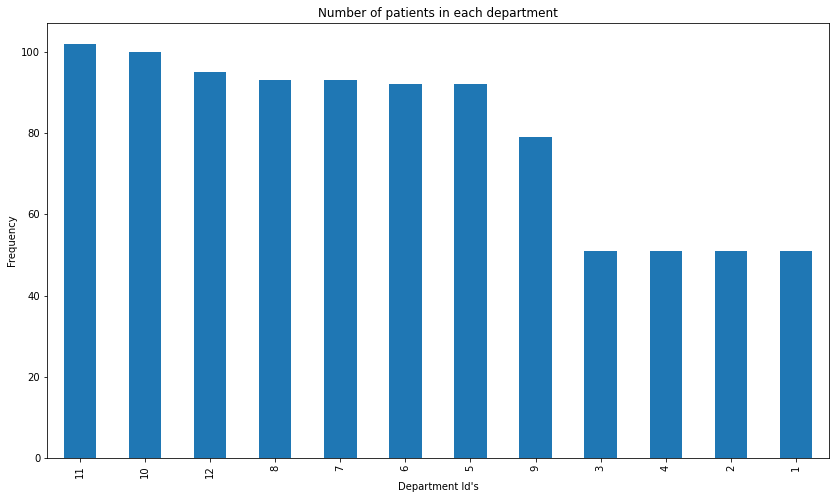

In [69]:
ax = df3['VisitDepartmentID'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of patients in each department")
ax.set_xlabel("Department Id's")
ax.set_ylabel("Frequency")

### 24. Using Arrays and Loops, find the count of of patients based on gender

In [70]:
#read excle into dataframe
df4 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Patients')

In [74]:
#the count of each of the distinct values of a specific column, you can use the pandas value_counts() function
print(df4['Gender'].value_counts())

Male      537
Female    408
Name: Gender, dtype: int64


### 25. Plot a graph to count the patients based on discharge disposition

In [75]:
#read excle into dataframe
df5 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='ReAdmissionRegistry')

Text(0, 0.5, 'Frequency')

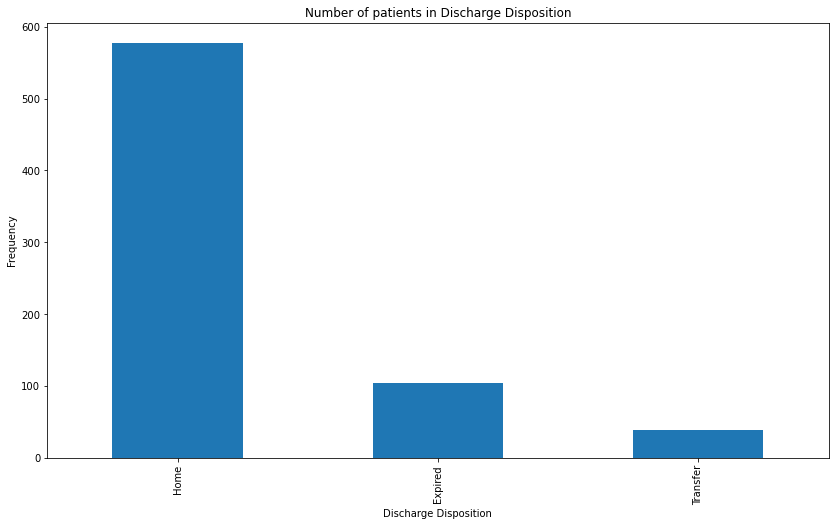

In [77]:
dd = df5['DischargeDisposition'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of patients in Discharge Disposition")
dd.set_xlabel("Discharge Disposition")
dd.set_ylabel("Frequency")

### 26. Which reason of visit has maximum mortality rate

In [79]:
#read excle into dataframe
df6 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='ReAdmissionRegistry')

In [87]:
mortality = df6.groupby('PrimaryDiagnosis')['ExpectedMortality'].sum()
mortality

PrimaryDiagnosis
AMI                   11.287028
Afib                   3.346590
Broken Leg             2.478958
Diabetes              18.334439
Fever                  5.635418
Flu                   21.838083
Heart Failure         30.082879
Hip Fracture           8.586140
Hypertension          14.827774
Kidney Failure         4.951837
Knee Replacement       6.678844
Laceration             7.917630
Migraine               6.808469
Pain                   3.837848
Pneumonia             66.307360
Spinal Cord Injury     0.400558
Stroke                30.085412
Name: ExpectedMortality, dtype: float64

### 27. Calculate average LOS

In [88]:
#read excle into dataframe
df7 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='ReAdmissionRegistry')

In [89]:
#Calculate average LOS
avg_LOS = df7["ExpectedLOS"].mean()
avg_LOS

8.824589159156156

### 28. Which patient id has most entries in readmission registry 

In [97]:
#read excle into dataframe
df8 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='ReAdmissionRegistry')

In [172]:
val_count = df8['PatientID'].value_counts().head(1)
print(val_count)

23    3
Name: PatientID, dtype: int64


In [ ]:
#patient ID 23 has most frequency of 3

In [107]:
print(df8['PatientID'].value_counts().max())

3


### 29. Find count of White Spanish Male ***

In [108]:
#read excle into dataframe
df9 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Patients')

In [ ]:
w_s_m_count = df9.groupby('Courses')['Courses'].transform('count')
print(df)

In [173]:
family = np.where((df9['Gender'] == 'Male', df9['Race'] == 'White', df9['Language'] == 'Spanish'))


In [175]:
family

(array([0, 0, 0, ..., 2, 2, 2], dtype=int64),
 array([  0,   1,   2, ..., 117, 118, 119], dtype=int64))

In [125]:
#wsm = df9.groupby(family)['PatientID'].mean()
#print (wsm)

In [176]:
#wsmcount=df9.groupby(family)['PatientID'].count()

In [119]:
c = df9.groupby(['Gender','Race','Language'])['PatientID'].count()
print(c)

Gender  Race                    Language
Female  Black/African-American  English     119
                                Spanish      15
        White                   English     216
                                Spanish      55
Male    Black/African-American  English     306
                                Spanish      25
        White                   English     186
                                Spanish      15
Name: PatientID, dtype: int64


### 30. Write a function to print the table of the given number

In [126]:
n=int(input("Enter The Number : "))

i=1

while(i<=10):
    t=n*i
    print(n,"x",i,"=",t)
    i=i+1

Enter The Number : 5
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
5 x 10 = 50


### 61. Show a graph by multiplotting on the same canvas .

In [132]:
def multiplot_from_generator(g, num_columns, figsize_for_one_row=None):
    # call 'next(g)' to get past the first 'yield'
    next(g)
    # default to 15-inch rows, with square subplots
    if figsize_for_one_row is None:
        figsize_for_one_row = (15, 15/num_columns)
    try:
        while True:
            # call plt.figure once per row
            plt.figure(figsize=figsize_for_one_row)
            for col in range(num_columns):
                ax = plt.subplot(1, num_columns, col+1)
                next(g)
    except StopIteration:
        pass

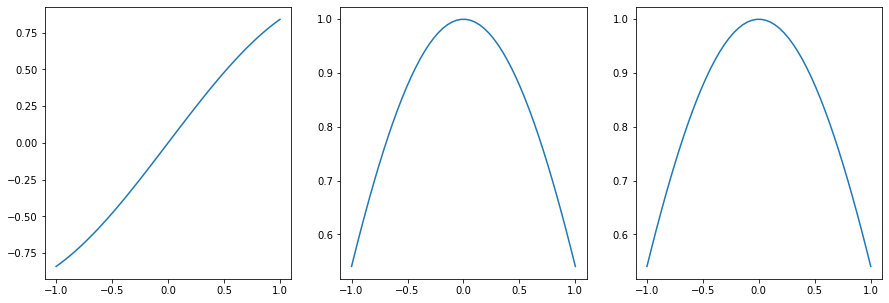

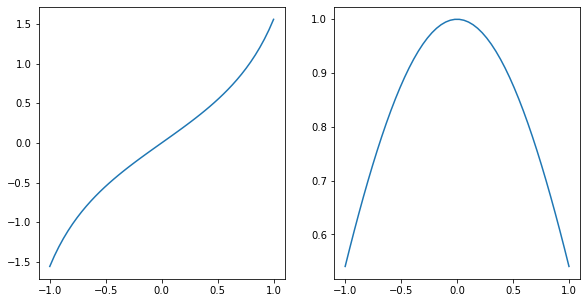

In [133]:
multiplot_from_generator(demo_plot_and_yield(), 3)

### 62. Display the data for all 'White Female' patients above the age of 50

In [134]:
#read excle into dataframe
df10 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Patients')

In [158]:
df10['Age'] = pd.to_datetime(df10.DateOfBirth)
df10['Age']
df10

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960-01-01 00:00:00.000
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985-11-15 02:08:42.090
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976-04-15 02:52:09.762
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,1968-10-15 03:32:13.635
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962-05-01 19:12:58.950
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,1986-05-26 00:01:19.761
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,1970-06-10 21:41:03.814
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,1983-01-08 21:49:27.884
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,1963-06-05 07:57:05.569


In [159]:
print(type(df10['Age']))

<class 'pandas.core.series.Series'>


In [160]:
#function to calculate age
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [166]:
df10['Age'].apply(lambda x: from_dob_to_age(x))

0      62
1      36
2      46
3      53
4      60
       ..
940    35
941    51
942    39
943    58
944    49
Name: Age, Length: 945, dtype: int64

In [168]:
#calculate the age
df10['result_Age']=df10['Age'].apply(lambda x: from_dob_to_age(x))

In [171]:
# After age above 50
df10[(df10['Race'] == 'White') & (df10['Gender'] == 'Female') & (df10['result_Age'] > 50)]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,result_Age
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,1967-12-09 05:01:37.892,54
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,1960-10-08 01:42:51.212,61
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,1960-11-28 18:05:11.459,61
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,1966-04-14 06:01:07.169,56
44,45,Barret,Doubrava,1962-10-18 08:23:23.478,Female,White,Spanish,1962-10-18 08:23:23.478,59
...,...,...,...,...,...,...,...,...,...
864,865,Giovanni,Borland,1960-12-01 13:16:18.100,Female,White,English,1960-12-01 13:16:18.100,61
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,1970-12-09 04:49:48.933,51
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,1967-03-10 08:18:47.908,55
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,1969-08-15 11:05:30.165,52


### 63. Using loc, retrieve the firstname and lastname of patients between indices 101 and 200

In [177]:
#read excle into dataframe
df11 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Patients')

In [178]:
#read excle into dataframe
df12 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='ReAdmissionRegistry')

In [179]:
# merge the two dataframes
res = pd.merge(df11, df12, how='inner', on=['PatientID', 'PatientID'])

In [187]:
#get the indices from 101 and 200
res1=res.iloc[101:201]

In [189]:
#get First name, last name and LOC
res1[['FirstName', 'LastName', 'ExpectedLOS']]

,FirstName,LastName,ExpectedLOS
101,Far,Rudinger,9.810658
102,Skippie,Breagan,12.700672
103,Calla,Scupham,6.390662
104,Gan,Harrild,4.842255
105,Pollyanna,Bonifant,12.680417
...,...,...,...
196,Nata,Liddle,10.653874
197,Maryl,Genders,15.442762
198,Cummings,Malbon,10.507869
199,Cathlene,Kidwell,9.045995


### 64. Using numpy functions, multiply the following arrays
### a=np.arange(6).reshape(2,3)
### b=np.arange(6).reshape(3,2)

In [190]:
a=np.arange(6).reshape(2,3)

In [191]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [192]:
b=np.arange(6).reshape(3,2)

In [193]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [194]:
#dot() function is used to multiply
result_multi = np.dot(a,b)

In [195]:
result_multi

array([[10, 13],
       [28, 40]])

### 65. Get the count of number of patients based on service and primary diagnosis

In [196]:
#read excle into dataframe
df13 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='ReAdmissionRegistry')

In [197]:
cnt_pait = df13.groupby(['Service','PrimaryDiagnosis'])['PatientID'].count()

In [198]:
cnt_pait

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

### 66. np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30

In [201]:
arr=np.arange(1,31).reshape(6,5)

In [202]:
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [205]:
y = arr[[[0],[4],[5]],[3,4]]

In [206]:
y

array([[ 4,  5],
       [24, 25],
       [29, 30]])

### 67. Make a pivot table by counts the no. of patients from the admission date till discharge date

In [207]:
#read excle into dataframe
df14 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Discharges')

In [210]:
pivot1 = pd.pivot_table(
    data=df14,
    index=['AdmissionDate','DischargeDate'],
    values='PatientID',
    aggfunc='sum'
)

In [211]:
pivot1

PatientID
AdmissionDate DischargeDate                     
2018-01-01    2018-01-04 19:59:31.391          1
              2018-01-04 21:28:51.898          2
              2018-01-04 22:28:23.672          3
              2018-01-05 05:47:04.933          5
              2018-01-05 14:18:30.029          6
...                                          ...
2018-02-22    2018-03-07 21:22:10.061        738
              2018-03-08 02:43:18.749        739
              2018-03-08 09:27:18.377        740
              2018-03-10 06:06:12.068        741
              2018-03-10 20:38:30.568        742

[720 rows x 1 columns]

### 68. Display the data where actual LOS is greater than expected LOS

In [212]:
#read excle into dataframe
df15 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Discharges')

In [260]:
#calculate actual LOS
df15['diff_days'] = df15['DischargeDate']- df15['AdmissionDate']

In [261]:
df15['diff_days']

0      6 days 18:06:06.408000
1     12 days 02:59:04.667000
2      4 days 16:16:06.782000
3      8 days 04:48:33.134000
4      8 days 13:32:36.157000
                ...          
715   13 days 03:31:05.262000
716    4 days 15:09:02.584000
717    5 days 07:59:32.385000
718   11 days 12:31:55.958000
719   16 days 20:38:30.568000
Name: diff_days, Length: 720, dtype: timedelta64[ns]

In [263]:
df15

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,diff_days
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540,6 days 18:06:06.408000
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days 02:59:04.667000
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days 16:16:06.782000
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163,8 days 04:48:33.134000
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days 13:32:36.157000
...,...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13 days 03:31:05.262000
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930,4 days 15:09:02.584000
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128,5 days 07:59:32.385000
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892,11 days 12:31:55.958000


In [271]:
#convert to float
df15['number_of_days'] = pd.DataFrame(df15['diff_days']).apply(np.float32)

In [272]:
#comparing atual LOS and expected LOS
df15[(df15['number_of_days'] > df15['ExpectedLOS'])]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,diff_days,number_of_days
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540,6 days 18:06:06.408000,5.835664e+14
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827,12 days 02:59:04.667000,1.047545e+15
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887,4 days 16:16:06.782000,4.041668e+14
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163,8 days 04:48:33.134000,7.085131e+14
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468,8 days 13:32:36.157000,7.399562e+14
...,...,...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695,13 days 03:31:05.262000,1.135865e+15
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930,4 days 15:09:02.584000,4.001426e+14
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128,5 days 07:59:32.385000,4.607724e+14
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892,11 days 12:31:55.958000,9.955160e+14


### 69. Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive

In [273]:
#read excle into dataframe
df16 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Patients')

In [280]:
df16[(df16['LastName'].str.contains('lua')) | (df16['FirstName'].str.contains('lua'))]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language


### 70. Plot a graph to show the distribution of expected mortality

In [283]:
#read excle into dataframe
df17 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Discharges')

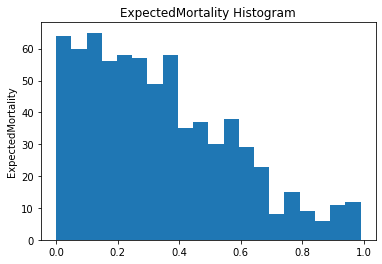

In [287]:

x = df17['ExpectedMortality']
plt.hist(x, bins=20)
plt.gca().set(title='ExpectedMortality Histogram', ylabel='ExpectedMortality');

### 81. Display full name of patients

In [288]:
#read excle into dataframe
df18 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Patients')

In [293]:
df18['FullName'] = df18.FirstName + ' ' + df18.LastName


In [294]:
df18

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,FullName
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,Lanni Sue
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,Far Myers
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,Devlin Michael
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,Carmine Texas
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,Tann Bama
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,Wat Fideler
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,Wandie Baythrop
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,Diahann Smeeton
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,Panchito Sharple


### 82. Retrieve the rows where SBP<140 and DBP<80

In [295]:
#read excle into dataframe
df19 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='AmbulatoryVisits')

In [296]:
df19[(df19['BloodPressureSystolic'] < 40) & (df19['BloodPressureDiastolic'] < 80)]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus


### 83. Create the plot below by adding two axes to a figure object at [0.1,0.1,0.9,0.9] & [0.2,0.6,0.3,0.3]

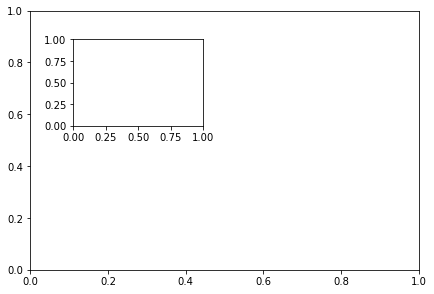

In [297]:
# Creating an empty object
fig = plt.figure()
 
# Creation of multiple axes
# main axes
axes1 = fig.add_axes([0.1, 0.1, 0.9, 0.9]) 
 
# secondary axes
axes2 = fig.add_axes([0.2, 0.6, 0.3, 0.3]) 

### 84. Find the list of patients whose ExpectedLOS is greater than the value given by the user

In [298]:
#read excle into dataframe
df20 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Discharges')

In [299]:
print("Enter a number")
a_input=float(input())

Enter a number
2.2


In [300]:
df20[(df15['ExpectedLOS'] > a_input)]

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468
...,...,...,...,...,...,...,...,...,...
715,715,716,2018-02-21,2018-03-06 03:31:05.262,Transfer,ICU,Heart Failure,11.362095,0.370695
716,698,723,2018-02-22,2018-02-26 15:09:02.584,Transfer,ICU,Heart Failure,10.262312,0.812930
717,704,724,2018-02-22,2018-02-27 07:59:32.385,Transfer,General Medicine,Pneumonia,6.036234,0.094128
718,716,733,2018-02-22,2018-03-05 12:31:55.958,Transfer,ICU,Heart Failure,13.323413,0.490892


### 85. Find count of Black/African American, English Females

In [301]:
#read excle into dataframe
df21 = pd.read_excel("C:\\Users\\aksha\\OneDrive\\Desktop\\E-Drive\\Numpy Ninja\\Python Hackathon\\HospitalDatabase.xlsx", sheet_name='Patients')

In [302]:
df21[(df21['Race'] == 'Black/African-American') & (df21['Gender'] == 'Female') & (df21['Language'] == 'English')].count()

PatientID      119
FirstName      119
LastName       119
DateOfBirth    119
Gender         119
Race           119
Language       119
dtype: int64